## Evolutionary Dynamics

# Exercises 1

In [122]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

## Problem 2: Logistic difference equation

In [159]:
def plot_discrete_evolution(func, start_point, num_steps=100):
    xs = [start_point]
    
    for _ in range(num_steps):
        xs.append(func(xs[-1]))
    
    plt.plot(xs)

In [86]:
def plot_pointcare_section(func, start_point, num_steps=100):
    xs = [start_point]
    ys = []
    
    for _ in range(num_steps):
        ys.append(xs[-1])
        xs.append(func(xs[-1]))
        
    plt.plot(xs[1:], ys, marker='.', markersize=5)

In [87]:
def f(x_t, r):
    return r*x_t*(1 - x_t)

### (c)

**r = 0.5**

In [88]:
f_05 = partial(f, r=0.5)

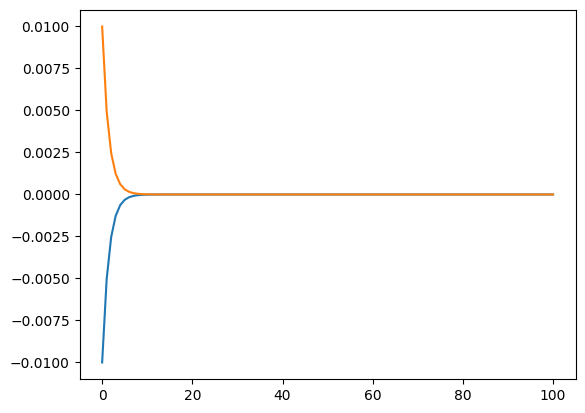

In [160]:
plot_discrete_evolution(f_05, -0.01)
plot_discrete_evolution(f_05, 0.01)

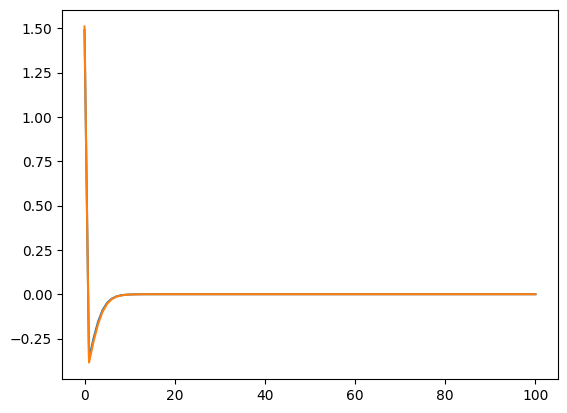

In [90]:
plot_discrete_evolution(f_05, 1.49)
plot_discrete_evolution(f_05, 1.51)

**r = 1.5**

In [91]:
f_15 = partial(f, r=1.5)

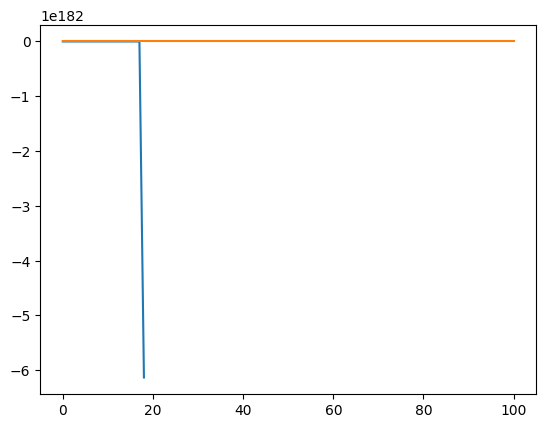

In [92]:
plot_discrete_evolution(f_15, -0.01)
plot_discrete_evolution(f_15, 0.01)

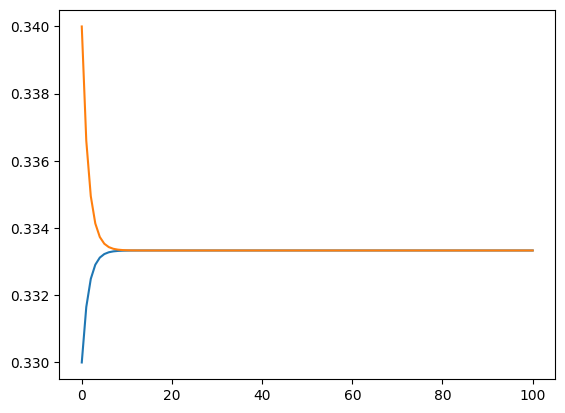

In [93]:
plot_discrete_evolution(f_15, 0.33)
plot_discrete_evolution(f_15, 0.34)

**r = 2.5**

In [94]:
f_25 = partial(f, r=2.5)

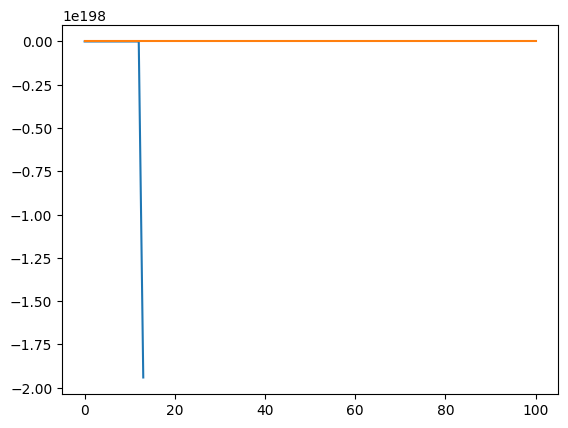

In [95]:
plot_discrete_evolution(f_25, -0.01)
plot_discrete_evolution(f_25, 0.01)

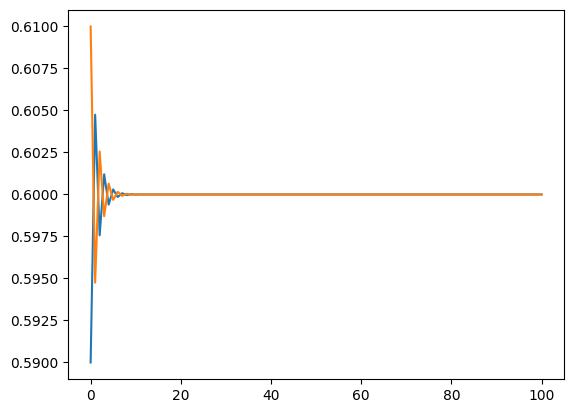

In [96]:
plot_discrete_evolution(f_25, 0.59)
plot_discrete_evolution(f_25, 0.61)

### (d)

In [97]:
f_35 = partial(f, r=3.5)

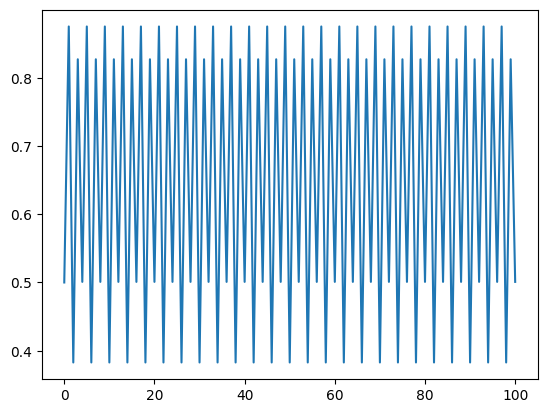

In [108]:
plot_discrete_evolution(f_35, 0.5)

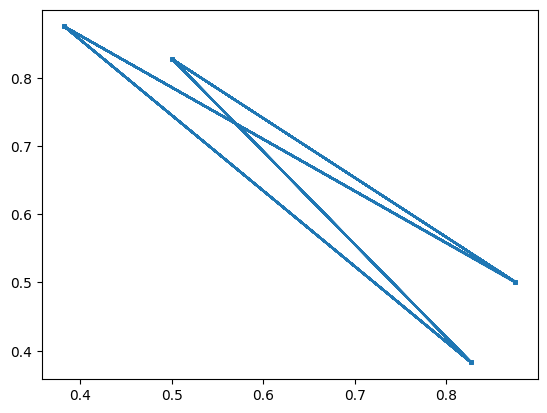

In [98]:
plot_pointcare_section(f_35, 0.5)

### (e)

In [100]:
f_39 = partial(f, r=3.9)

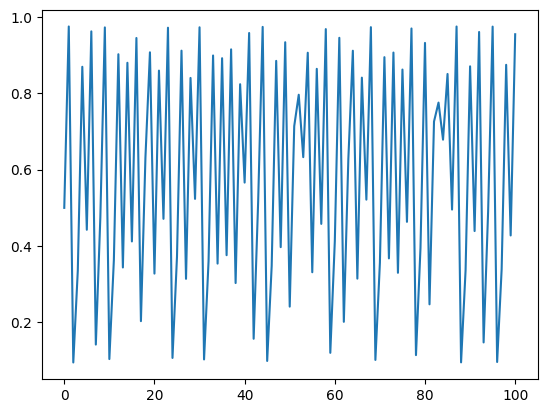

In [102]:
plot_discrete_evolution(f_39, 0.5)

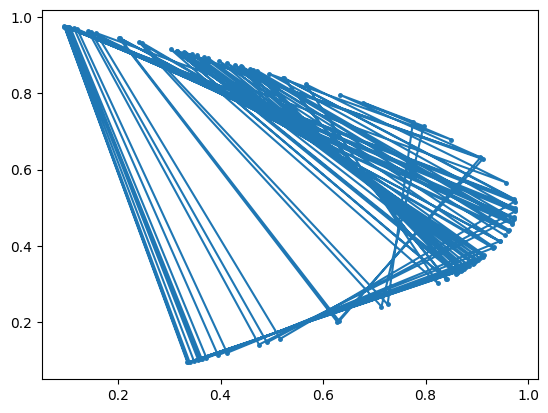

In [101]:
plot_pointcare_section(f_39, 0.5)

## Problem 3: Logistic growth in continuous time

In [167]:
def plot_continuous_evolution(func, start_time=0, end_time=5, num_steps=100):
    ts = np.linspace(start_time, end_time, num_steps)
    xs = list(map(func, ts))
    plt.plot(ts, xs)

In [169]:
def plot_approximate_continuous_evolution(derivative, initial_value, start_time=0, end_time=5, num_steps=100):
    result = solve_ivp(
        fun=derivative, 
        t_span=(start_time, end_time), 
        y0=[initial_value], 
        rtol=1e-10
    )
    plt.plot(result.t, result.y.flatten())

In [109]:
def dx(t, x, l, K):
    return l*x*(1 - x/K)

In [137]:
def x(t, l, K, x0):
    return (K * x0 * np.exp(l*t)) / (K + x0 * (np.exp(l*t) - 1))

### (c)

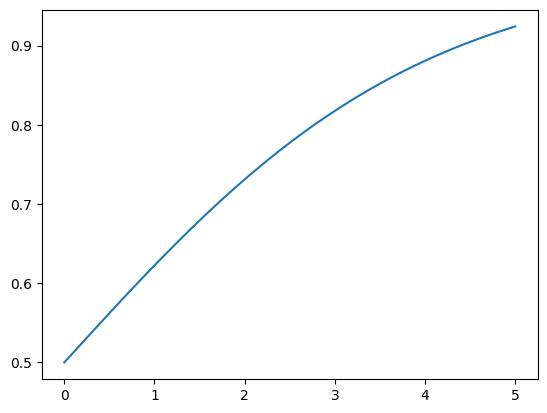

In [178]:
plot_continuous_evolution(partial(x, l=0.5, K=1, x0=0.5), 0, 5)

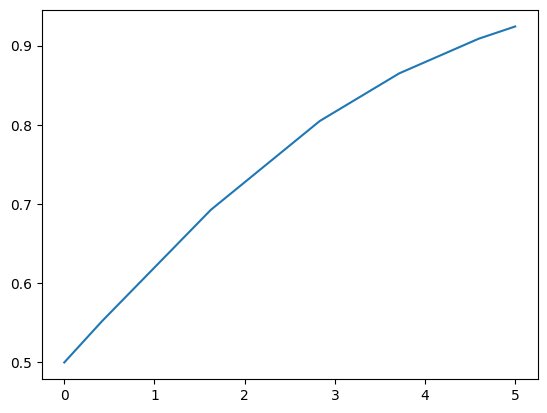

In [174]:
plot_approximate_continuous_evolution(partial(dx, l=0.5, K=1), 0.5)